In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot 
import seaborn as sns

In [3]:
dataset = pd.read_csv('train.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
Y_train = train.iloc[:,1].values
train.drop(columns=['Survived','Name','Ticket'],axis=1,inplace=True)
train.drop(columns=['Embarked','Cabin'],axis=1,inplace=True)
train = pd.get_dummies(train,columns=['Sex'],drop_first=True)

In [5]:
train.drop(columns=['PassengerId'],axis=1,inplace=True)

In [6]:
mean_value=train['Age'].mean()
train['Age']=train['Age'].fillna(mean_value)

mean_val=train['Fare'].mean()
train['Fare']=train['Fare'].fillna(mean_val)

In [7]:
X_train = train.iloc[:,:].values

**Exploratory Data Analysis**

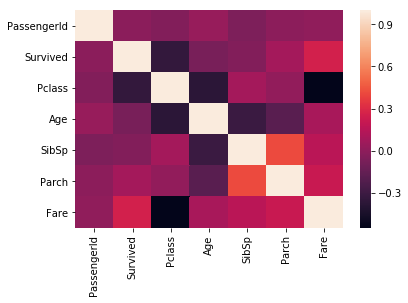

In [8]:
sns.heatmap(dataset.corr())

In [9]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


C:\Users\nkapu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


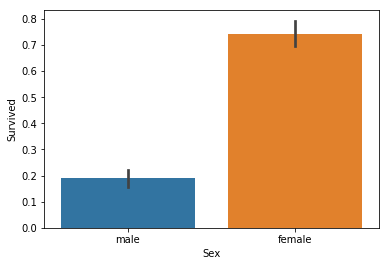

In [10]:
sns.barplot(x='Sex',y='Survived',data=dataset)

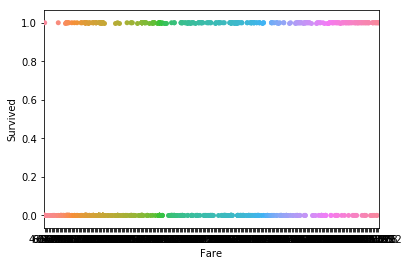

In [11]:
sns.stripplot(x='Fare',y='Survived',data=dataset)

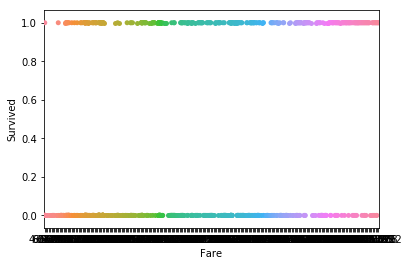

In [12]:
sns.swarmplot(x='Fare',y='Survived',data=dataset)

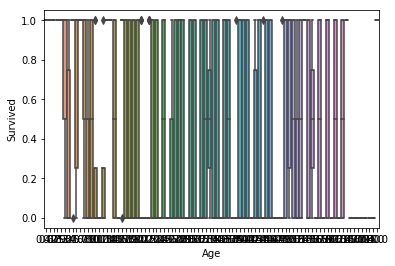

In [13]:
sns.boxplot(x='Age',y='Survived',data=dataset)

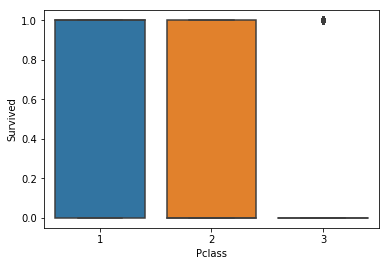

In [14]:
sns.boxplot(x='Pclass',y='Survived',data=dataset)

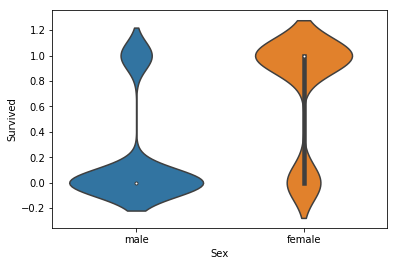

In [15]:
sns.violinplot(x='Sex',y='Survived',data=dataset)

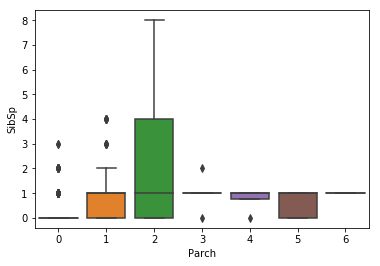

In [16]:
sns.boxplot(x='Parch',y='SibSp',data=dataset)

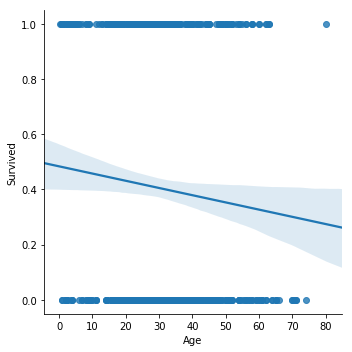

In [17]:
sns.lmplot(x='Age',y='Survived',data=dataset)

**Analysis**

In [18]:
test.drop(columns=['Name','Ticket'],axis=1,inplace=True)
test.drop(columns=['Embarked','Cabin'],axis=1,inplace=True)
test.drop(columns=['PassengerId'],axis=1,inplace=True)
test = pd.get_dummies(test,columns=['Sex'],drop_first=True)

In [19]:
mean_value=test['Age'].mean()
test['Age']=test['Age'].fillna(mean_value)

mean_val=test['Fare'].mean()
test['Fare']=test['Fare'].fillna(mean_val)

In [20]:
X_test = test.iloc[:,:].values

*Decision Tree*

In [21]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train, Y_train)
y_pred = dectree.predict(X_test)

In [22]:
gender = pd.read_csv('gender_submission.csv')
y_test = gender.iloc[:,1].values

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       266
           1       0.72      0.72      0.72       152

    accuracy                           0.80       418
   macro avg       0.78      0.78      0.78       418
weighted avg       0.80      0.80      0.80       418



*Random Forest*

In [24]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)

C:\Users\nkapu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       266
           1       0.76      0.68      0.72       152

    accuracy                           0.81       418
   macro avg       0.79      0.78      0.79       418
weighted avg       0.80      0.81      0.80       418



*XGBoost*

In [81]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=7,learning_rate=0.01,max_depth=3,n_estimators=100,n_jobs=10)
model.fit(X_train, Y_train)
y_pred1 = model.predict(X_test)
model.score(X_test,y_test)

0.9641148325358851

In [90]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [91]:
regressor.fit(X_train, Y_train)
y_pred2 = regressor.predict(X_test)
regressor.score(X_test,y_test)

C:\Users\nkapu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9641148325358851

In [92]:
final_y = (y_pred1+y_pred2)/2

In [93]:
print(classification_report(y_test,final_y))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [36]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=30, random_state=7)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9354066985645934

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=30, random_state=7)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9497607655502392

In [31]:
df_test = pd.read_csv('test.csv')

In [ ]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred})

In [ ]:
submission.head()

Logistic Regression

In [ ]:
filename = 'Titanic-Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)